In [1]:
import numpy as np
import pandas as pd
from divination import Divination

In [2]:
dates = [np.datetime64('2020-01-01') + np.timedelta64(idx, 'D') for idx in range(1024)]
sin = np.sin(np.linspace(0, 4 * 2 * np.pi, len(dates))) + np.random.normal(size=len(dates))
cos = np.cos(np.linspace(0, 4 * 2 * np.pi, len(dates))) + np.random.normal(size=len(dates))
combined = sin + cos

In [3]:
data = pd.DataFrame.from_dict({
    'date': dates,
    'sin': sin,
    'cos': cos,
    'combined': combined
}).set_index('date')
data

,sin,cos,combined
date,,,
2020-01-01,-2.168021,2.107549,-0.060472
2020-01-02,2.019345,2.296219,4.315565
2020-01-03,-0.458741,-0.033662,-0.492403
2020-01-04,-0.817777,0.360959,-0.456818
2020-01-05,-0.616918,-0.858546,-1.475464
...,...,...,...
2022-10-16,0.741983,1.608055,2.350038
2022-10-17,0.606015,0.121446,0.727460
2022-10-18,1.799774,-0.008413,1.791361


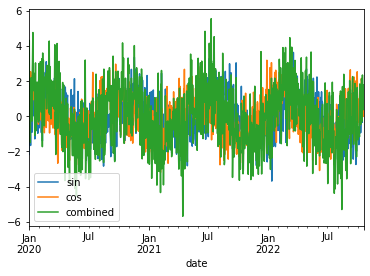

In [4]:
data.plot()

In [5]:
predictions = Divination(periods=8).fit(data).predict(data, num_steps=256)
predictions

,sin,cos,combined
date,,,
2020-01-01,-2.168021,2.107549,-0.060472
2020-01-02,2.019345,2.296219,4.315565
2020-01-03,-0.458741,-0.033662,-0.492403
2020-01-04,-0.817777,0.360959,-0.456818
2020-01-05,-0.616918,-0.858546,-1.475464
...,...,...,...
2023-06-29,-0.169096,1.024877,0.855781
2023-06-30,-0.141674,1.025242,0.883568
2023-07-01,-0.114300,1.025040,0.910740


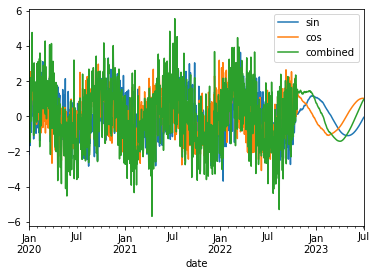

In [6]:
predictions.plot()